<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/creditcard_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine learning (2) - Final Project

###Team members:


*  Shihab Battah
*  Naseem Ananzeh
*  Rama Jaradat

*  Fatin Jaddo

IMPORTANT FOR TEAM
---
Kaggle Summary – Credit Card Fraud Detection Dataset

* Instances: 284,807 transactions

* Features: 30 total (28 PCA features + Time, Amount)

* Target: Class (1 = Fraud, 0 = Not Fraud)

* Data Type: All numerical

* Fraud Rate: 0.172% (492 frauds)







--------------------------------------------------------

    








>

#   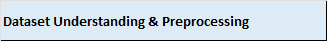

##**loading the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('creditcard.csv')

#Dataset Preview (First 10 rows)
data.head(10)
data['Class'].unique()

array([0, 1])

In [3]:
#Dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# Finding out which features(Columns) have missing values
data.isnull().sum()

# Nice! The dataset has no null values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
# We dropped the Time column because it’s not useful for detecting fraud
data=data.drop(['Time'],axis=1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
#split the data because we don't need the class column
X = data.drop(['Class'], axis=1)
y = data['Class']

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the 'Amount' feature
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X['Amount']

,Amount
0,0.244964
1,-0.342475
2,1.160686
3,0.140534
4,-0.073403
...,...
284802,-0.350151
284803,-0.254117
284804,-0.081839
284805,-0.313249


<Axes: ylabel='count'>

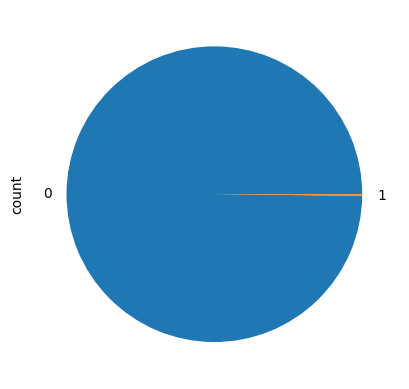

In [35]:
y.value_counts().plot.pie()

## fix the high balannce


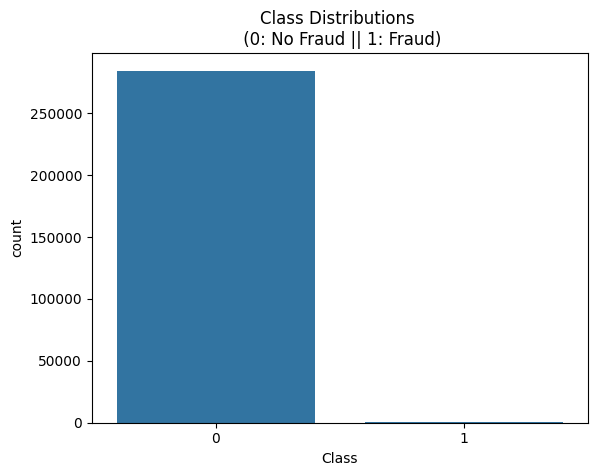

In [15]:
import seaborn as sns
sns.countplot(x='Class',data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()

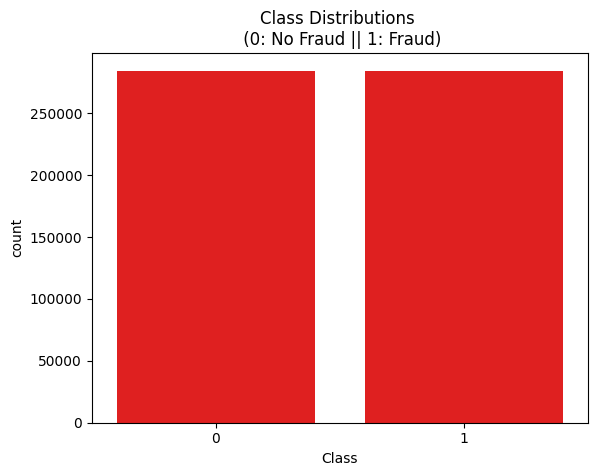

In [25]:
from imblearn.over_sampling import RandomOverSampler
resampler = RandomOverSampler()
X_resampled, y_resampled = resampler.fit_resample(X, y)
sns.countplot(x="Class",data=pd.DataFrame(y_resampled),color='r')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()

<Axes: ylabel='count'>

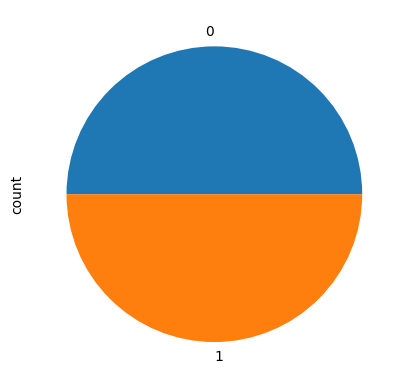

In [36]:
y_resampled.value_counts().plot.pie()

#Techniques and Algorithms You Must Apply


##**Dimensionality Reduction**

In [40]:
corr_matrix = X_resampled.corr()
corr_matrix

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000,-0.789146,0.878204,-0.614743,0.857948,0.313638,0.879522,-0.076850,0.656962,0.738859,...,-0.290653,0.014791,-0.037323,-0.047275,-0.068249,-0.077807,0.055560,0.190328,0.175320,-0.038528
V2,-0.789146,1.000000,-0.851918,0.671055,-0.787919,-0.272791,-0.842038,-0.023741,-0.695639,-0.764854,...,0.302515,0.043098,-0.006722,0.145234,-0.004903,0.107330,-0.003320,-0.158135,-0.000191,-0.242823
V3,0.878204,-0.851918,1.000000,-0.770770,0.851384,0.454118,0.885807,-0.168386,0.764767,0.856693,...,-0.338866,0.027784,-0.064433,-0.031810,0.014736,-0.084875,-0.013759,0.102647,0.123784,-0.010449
V4,-0.614743,0.671055,-0.770770,1.000000,-0.578081,-0.427442,-0.709045,0.101834,-0.788076,-0.793577,...,0.284021,-0.020298,0.116731,0.022785,-0.077946,-0.025708,0.144007,-0.011200,-0.066145,0.007376
V5,0.857948,-0.787919,0.851384,-0.578081,1.000000,0.281232,0.832440,-0.201929,0.658124,0.757669,...,-0.304046,0.042663,-0.094657,-0.082381,-0.132225,-0.083157,0.059573,0.184495,0.162945,-0.120210
V6,0.313638,-0.272791,0.454118,-0.427442,0.281232,1.000000,0.283479,-0.569272,0.365394,0.418996,...,-0.106872,0.020784,-0.001996,0.313219,-0.023971,-0.131096,-0.039489,-0.159443,-0.032172,0.175320
V7,0.879522,-0.842038,0.885807,-0.709045,0.832440,0.283479,1.000000,0.090411,0.762372,0.865254,...,-0.369644,0.039142,-0.117520,-0.091564,-0.042326,0.051080,0.023991,0.231471,0.143007,0.133747
V8,-0.076850,-0.023741,-0.168386,0.101834,-0.201929,-0.569272,0.090411,1.000000,-0.075393,-0.051797,...,-0.036012,-0.113793,0.037566,-0.415678,0.074541,0.228596,0.046287,0.283097,-0.013964,0.016970
V9,0.656962,-0.695639,0.764767,-0.788076,0.658124,0.365394,0.762372,-0.075393,1.000000,0.848300,...,-0.377518,0.158613,-0.240544,-0.052902,0.014471,-0.007564,-0.124955,0.125617,0.132784,0.024910
V10,0.738859,-0.764854,0.856693,-0.793577,0.757669,0.418996,0.865254,-0.051797,0.848300,1.000000,...,-0.369252,0.082848,-0.210648,-0.051067,0.003049,0.022582,-0.033613,0.148532,0.127228,0.002272


**Note**:There is a good Correlation between the Feature , for that we need  ***PCA*** for reduce the dimensionality and data become ***uncorlleted***

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_resampled)
xx=pd.DataFrame(X_reduced)
xx

,0,1
0,9.495051,-0.899878
1,9.509886,-0.709323
2,9.589654,-0.799729
3,9.641772,-0.966972
4,9.457693,-1.141507
...,...,...
568625,-0.574878,3.469465
568626,-7.048285,2.292182
568627,7.075786,-9.701726
568628,-32.118182,2.296820


Text(0, 0.5, 'Second principal component')

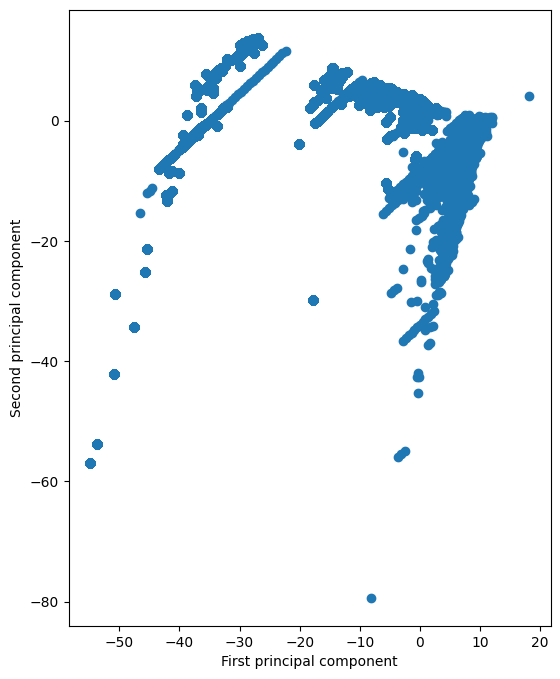

In [54]:
plt.figure(figsize=(8, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")